## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
import re
import string
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# Ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read csv files

In [2]:
d = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv',encoding='latin1');
f = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv',encoding='latin1');
df = pd.concat([d,f])

## Explore dataset

In [3]:

df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


## Convert Data

In [4]:
df.dropna(inplace=True)

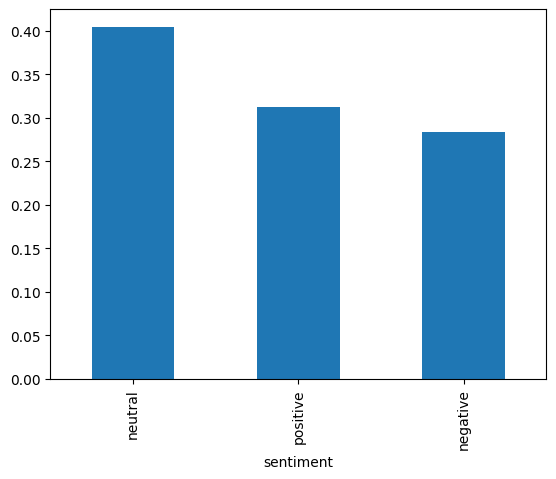

In [5]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

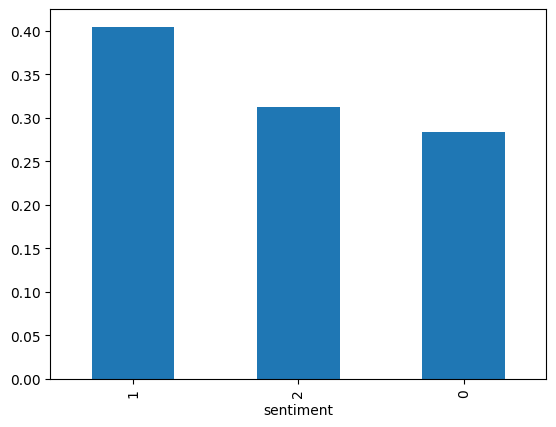

In [6]:
# Converting  sentiment column to categorical variable
df['sentiment'] = df['sentiment'].astype('category').cat.codes
df['sentiment'].value_counts(normalize=True).plot(kind='bar');

In [7]:
# Converting  Time of Tweet and Country column to categorical variable
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes


# converting  Age of User to integer
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})

## Drop unuseful data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27480 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27480 non-null  int8   
 4   Time of Tweet     27480 non-null  int8   
 5   Age of User       27480 non-null  int64  
 6   Country           27480 non-null  int16  
 7   Population -2020  27480 non-null  float64
 8   Land Area (Km²)   27480 non-null  float64
 9   Density (P/Km²)   27480 non-null  float64
dtypes: float64(3), int16(1), int64(1), int8(2), object(3)
memory usage: 1.8+ MB


In [9]:
df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0
2,my boss is bullying me...,bullying me,0
3,what interview! leave me alone,leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,0
27477,I`ve wondered about rake to. The client has ...,", don`t force",0
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,2
27479,But it was worth it ****.,But it was worth it ****.,2


## Creat a function to process text

In [10]:
def wp(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [11]:
df['selected_text'] = df["selected_text"].apply(wp)

## Split data

In [12]:
X=df['selected_text']
y= df['sentiment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21984,)
(5496,)
(21984,)
(5496,)


## Convert text to vectors

In [14]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

## Logistic regression

In [15]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


LogisticRegression(n_jobs=-1)

In [16]:
pred_lr=lr.predict(XV_test)

In [17]:
#accuracy score
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.8309679767103348

In [18]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1572
           1       0.79      0.88      0.84      2236
           2       0.91      0.81      0.85      1688

    accuracy                           0.83      5496
   macro avg       0.84      0.82      0.83      5496
weighted avg       0.84      0.83      0.83      5496



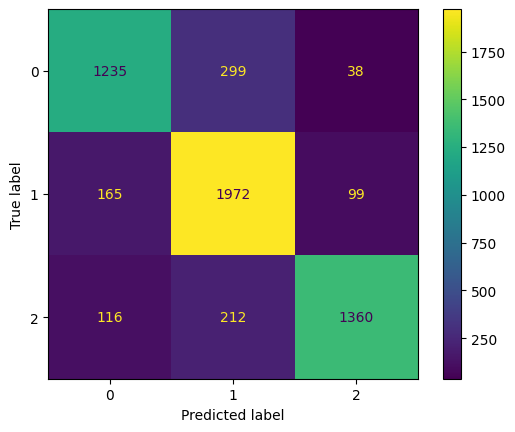

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr);

## Decision Tree Classification

In [20]:
dt = DecisionTreeClassifier()
dt.fit(XV_train, y_train)

DecisionTreeClassifier()

In [21]:
pred_dt = dt.predict(XV_test)

In [22]:
score_dt = dt.score(XV_test, y_test)
print(f"The Accuracy of Decision Tree is{score_dt}")

The Accuracy of Decision Tree is0.7669213973799127


In [23]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1572
           1       0.77      0.78      0.77      2236
           2       0.83      0.77      0.80      1688

    accuracy                           0.77      5496
   macro avg       0.77      0.77      0.77      5496
weighted avg       0.77      0.77      0.77      5496



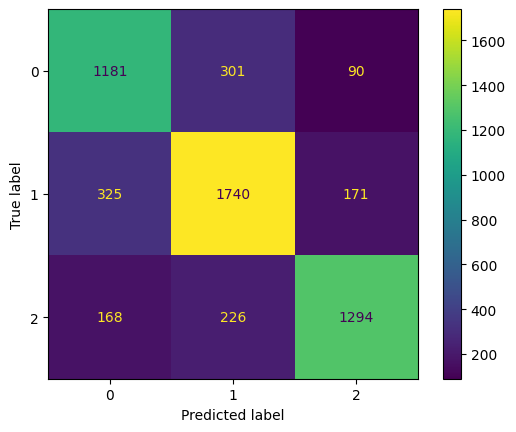

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_dt);

## Random Forest Classifier

In [25]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
pred_rfc = rfc.predict(XV_test)

In [27]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.8138646288209607

In [28]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1572
           1       0.77      0.90      0.83      2236
           2       0.92      0.76      0.83      1688

    accuracy                           0.81      5496
   macro avg       0.83      0.80      0.81      5496
weighted avg       0.82      0.81      0.81      5496



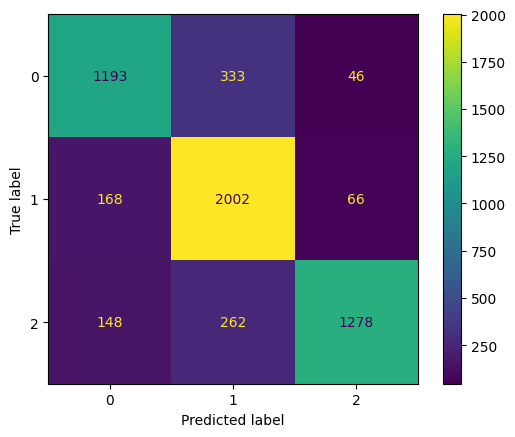

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_rfc);

## Best model in accuracy

In [30]:
print(f'Logistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandom Forest Classifier {score_rfc}')

Logistic regression 0.8309679767103348
Decision Tree Classification 0.7669213973799127
Random Forest Classifier 0.8138646288209607


In [31]:
# Import the Naive Bayes classifiers from scikit-learn
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score

# Define the classifiers
classifiers = [MultinomialNB(), BernoulliNB(), GaussianNB()]

# Iterate through the classifiers
for classifier in classifiers:
    # Fit the classifier on the training data
    # Convert the sparse matrix to a dense array using .toarray()
    nb_classifier = classifier
    nb_classifier.fit(XV_train.toarray(), y_train)

    # Use the classifier to make predictions on the test data
    # Convert the sparse matrix to a dense array using .toarray()
    predictions = nb_classifier.predict(XV_test.toarray())

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(y_test, predictions)

    # Print the classifier and its accuracy
    print(f"The classifier is {classifier.__class__.__name__} and the accuracy is {accuracy}")


The classifier is MultinomialNB and the accuracy is 0.7780203784570596
The classifier is BernoulliNB and the accuracy is 0.766193595342067
The classifier is GaussianNB and the accuracy is 0.5897016011644832


# Hyper Parameter Tunning using Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs']  # Solver types
}

# Initialize Logistic Regression model
lr = LogisticRegression(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(XV_train, y_train)

# Print the best parameters and accuracy
print(f"Best parameters for Logistic Regression: {grid_search.best_params_}")
print(f"Best accuracy for Logistic Regression: {grid_search.best_score_}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best accuracy for Logistic Regression: 0.8269194212366235


In [33]:
# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(XV_train, y_train)

# Print the best parameters and accuracy
print(f"Best parameters for Decision Tree: {grid_search.best_params_}")
print(f"Best accuracy for Decision Tree: {grid_search.best_score_}")


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.7618266797425575


In [34]:
# Define parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Smoothing parameter
}

# Initialize MultinomialNB model
nb_classifier = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(XV_train.toarray(), y_train)

# Print the best parameters and accuracy
print(f"Best parameters for MultinomialNB: {grid_search.best_params_}")
print(f"Best accuracy for MultinomialNB: {grid_search.best_score_}")


Best parameters for MultinomialNB: {'alpha': 0.1}
Best accuracy for MultinomialNB: 0.7855256592974406


In [36]:
# # Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
}

# Initialize Random Forest model
rfc = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(XV_train, y_train)

# Print the best parameters and accuracy
print(f"Best parameters for Random Forest: {grid_search.best_params_}")
print(f"Best accuracy for Random Forest: {grid_search.best_score_}")


Best parameters for Random Forest: {'n_estimators': 500}
Best accuracy for Random Forest: 0.8113169848827775
